# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [1]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [31]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

In [3]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f'The area of a circle with radius {radius} is {area:.2f}')

The area of a circle with radius 1 is 3.14
The area of a circle with radius 2 is 12.57
The area of a circle with radius 3 is 28.27


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [32]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column


# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

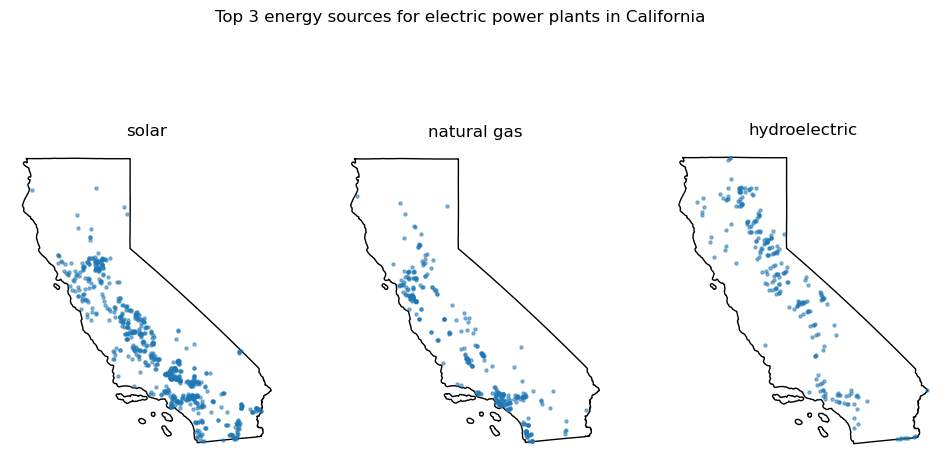

In [2]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Steps to create a function 

Steps:
1. Solce problem with one example
2. Identify what needs to be generalized
3. wrap in function 
4. add additional parameters
5. test function
6. add docstring
    
    Example: we want to obtain the top 4 power sources for any state as a function 
    
### Step 1: solve for a specific example (CA)

In [3]:
state_power_plants = power_plants[power_plants['state']== 'California']

top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
              .tolist())

### Step 2 identify the parts of the code that need to be generalized

In [4]:
state = 'California'
state_power_plants = power_plants[power_plants['state']== state]

top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
              .tolist())

### step 3: wrap in function &
### step 4: adjust parameters

In [5]:
def top3_sources(state, power_plants):
    state_power_plants = power_plants[power_plants['state']== state]

    
    top_sources = (state_power_plants['primsource']
               .value_counts()
               .index[:3]
              .tolist())
    return top_sources

In [6]:
top3_sources('New York', power_plants)

['solar', 'hydroelectric', 'natural gas']

## Example 
Create a function that will produce a plot of the top 3 energy sources for each state 

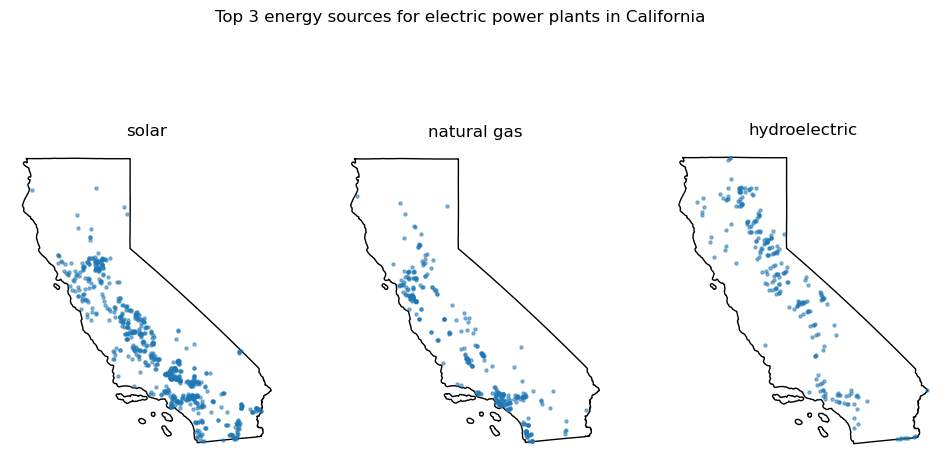

In [7]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

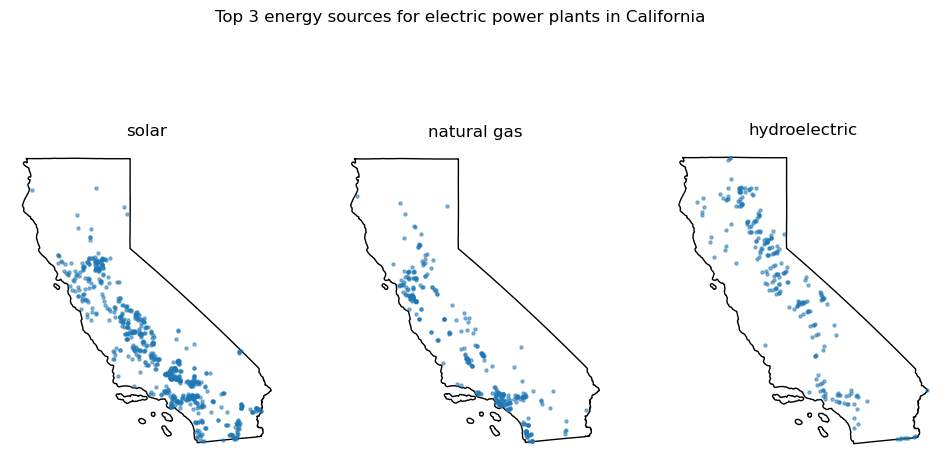

In [8]:
### Step 2: which parts of the code need to be generalized
state = 'California'

# Select power plants and boundary
power_plants = power_plants[power_plants['state'] == 'California']
boundary = states[states['name'] == 'California']

# Top 3 power sources were previously given
top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = power_plants[power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

In [9]:
def state_top_plot(state, power_plants, states):
    # Select power plants and boundary
    power_plants = power_plants[power_plants['state'] == state]
    boundary = states[states['name'] == state]

    # Top 3 power sources were previously given
    top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        boundary.plot(ax=axis,
                         color='none')

        # Subset power plants by source and plot
        source_subset = power_plants[power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

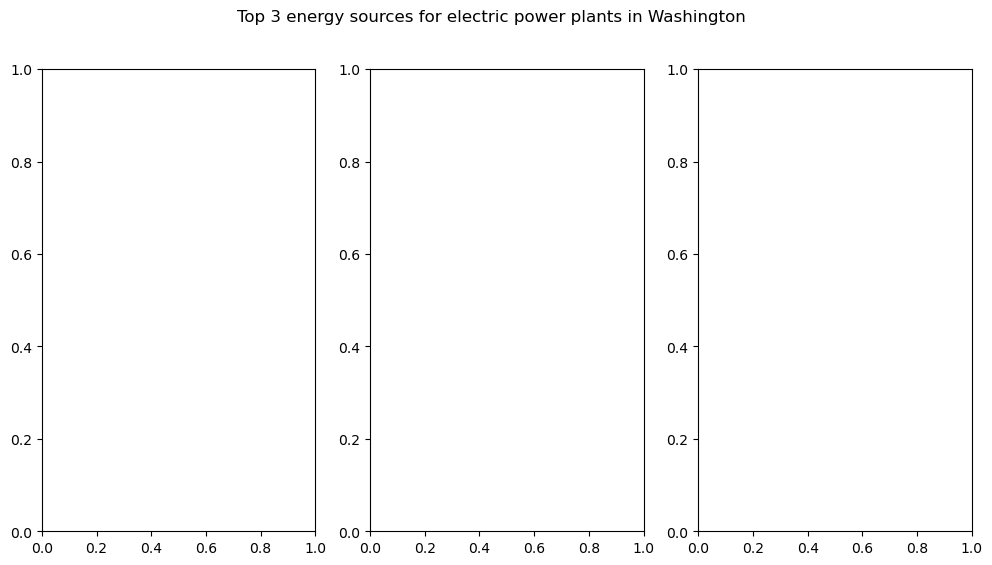

In [10]:
state_top_plot('Washington', power_plants, states)

In [33]:
def top_source_states(source, power_plants):
    top_states = power_plants[power_plants['primsource']== source]
    top_3 = top_states.groupby('state').size().sort_values(ascending = False).head(3).index.to_list()
    return top_3

In [34]:
top_source_states('solar', power_plants)

['California', 'North Carolina', 'Massachusetts']

In [53]:
# Excercise 2 


def top_3_states(source):
   # Top 3 power sources were previously given
   top_states = top_source_states(source, power_plants)

   only_source = power_plants[power_plants['primsource'] == source]

   # Create subplots for each top source in a single figure
   fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
   for axis, state in zip(ax, top_states):   # Iterate over subplots and top sources
      
   # Select power plants and boundary
      power_b_state = only_source[only_source['state'] == state]
      subset_boundary = states[states['name'] == state]

      axis.set_title(state)
      axis.axis('off')

      subset_boundary.boundary.plot(ax=axis, edgecolor = 'black')

      # Subset power plants by state and plot
      
      power_b_state.plot(ax=axis,
                     markersize=5,
                     alpha=0.5)
   fig.suptitle(f'The top three states for {source} energy', y = .8)

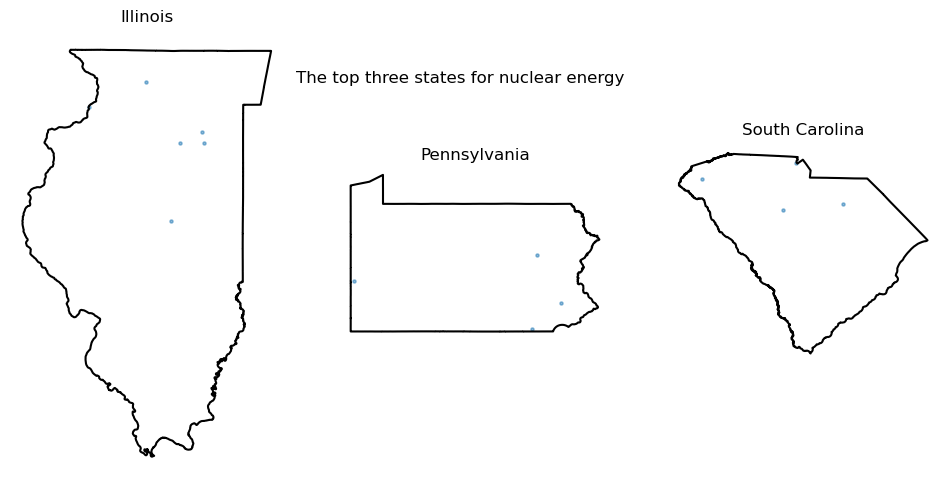

In [54]:
top_3_states('nuclear')
